# Zomato-API2 <br>Utkarsh Maheshwari


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
zomato_data = pd.read_csv('Downloads/zomato.csv', encoding='latin-1')
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [69]:
print(zomato_data.info())
print(zomato_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [70]:
# # Drop rows with NaN cuisines
# zomato_data.dropna(inplace=True)

In [71]:
# # Drop rows where Average Cost for two is zero
# zero_cost=zomato_data[zomato_data['Average Cost for two']==0].index
# zomato_data.drop(zero_cost,inplace=True)

In [72]:
# Replace 'Yes' with 1 and 'No' with 0
zomato_data.loc[zomato_data['Has Table booking']=='Yes','Has Table booking']=np.int(1)
zomato_data.loc[zomato_data['Has Table booking']=='No','Has Table booking']=np.int(0)

zomato_data.loc[zomato_data['Has Online delivery']=='Yes','Has Online delivery']=np.int(1)
zomato_data.loc[zomato_data['Has Online delivery']=='No','Has Online delivery']=np.int(0)

zomato_data.loc[zomato_data['Is delivering now']=='Yes','Is delivering now']=np.int(1)
zomato_data.loc[zomato_data['Is delivering now']=='No','Is delivering now']=np.int(0)

zomato_data.loc[zomato_data['Switch to order menu']=='Yes','Switch to order menu']=np.int(1)
zomato_data.loc[zomato_data['Switch to order menu']=='No','Switch to order menu']=np.int(0)

In [90]:
df = zomato_data.copy()

### --------------------------------------------------------------------------------------------------------------------------------------------------------<br>------------------------------------------------------------------------------------------------------------------------------------------------------------

# (1)The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

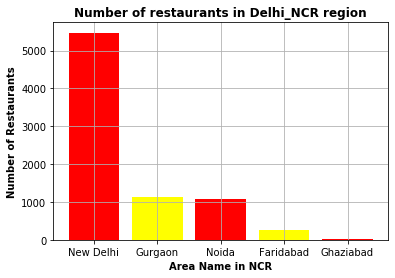

In [74]:
#df_ind will contain data only from India
df_ind=(df.loc[df['Country Code']==1,:]).copy()

#Plot the data of how restaurants are distributed in NCR region
plt.bar(x=df_ind['City'].value_counts().index[0:5],height=df_ind['City'].value_counts().values[0:5],color=['red','yellow'])
plt.title("Number of restaurants in Delhi_NCR region",fontweight='bold')
plt.xlabel("Area Name in NCR",fontweight='bold')
plt.ylabel("Number of Restaurants",fontweight='bold')
plt.grid('on')
plt.show()

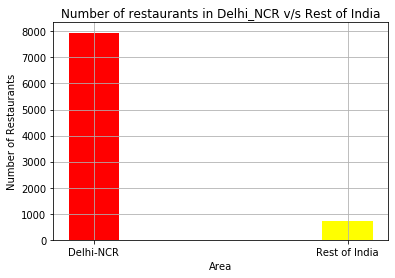

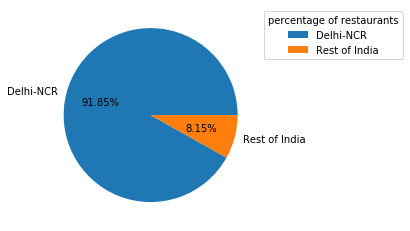

NUmber of restaurans are :
Delhi-NCR: 7947
Rest of India 705


In [75]:
#Chage city anme of New Delhi, Gurgaon, Noida, Faridabad and ghaziabad to Delhi-NCR
df_ind.loc[df_ind['City']=='New Delhi','City']='Delhi-NCR'
df_ind.loc[df_ind['City']=='Gurgaon','City']='Delhi-NCR'
df_ind.loc[df_ind['City']=='Noida','City']='Delhi-NCR'
df_ind.loc[df_ind['City']=='Faridabad','City']='Delhi-NCR'
df_ind.loc[df_ind['City']=='Ghaziabad','City']='Delhi-NCR'

#Plot the graph
plt.bar(x=['Delhi-NCR','Rest of India'],height=[df_ind['City'].value_counts().values[0],sum(df_ind['City'].value_counts().values[1:])],width=0.2,color=['red','yellow'])
plt.title("Number of restaurants in Delhi_NCR v/s Rest of India")
plt.xlabel("Area")
plt.ylabel("Number of Restaurants")
plt.grid('on')
plt.show()
plt.pie([df_ind['City'].value_counts().values[0],sum(df_ind['City'].value_counts().values[1:])],labels=['Delhi-NCR','Rest of India'],autopct='%0.2f%%')
plt.legend(title="percentage of restaurants",loc="upper left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#summarize the result
print("NUmber of restaurans are :")
print("Delhi-NCR:",df_ind['City'].value_counts().values[0])
print("Rest of India",sum(df_ind['City'].value_counts().values[1:]))

### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [76]:
df_ind.dropna(inplace=True)

In [77]:
df_ind.reset_index(inplace=True,drop=True)

ncr=[] ## NCR list will hold all cuisines in Dlehi-NCR with repetition
for i in df_ind.loc[df_ind['City']=='Delhi-NCR','Cuisines']:
    temp=i.split(',')
    for i in temp:
        ncr.append(i.strip())

ind=[]## ind list will hold all cuisines in Dlehi-NCR with repetition
for i in df_ind.loc[df_ind['City']!='Delhi-NCR','Cuisines']:
    temp=i.split(',')
    for i in temp:
        ind.append(i.strip())
print("Cuisines available in rest of India but not in Delhi-NCR")
cuisine_not_present=[]

## set() for unique values
for i in (set(ind)-set(ncr)):
    cuisine_not_present.append(i)
    print(i)

Cuisines available in rest of India but not in Delhi-NCR
BBQ
Cajun
Malwani
German


In [78]:
## Check whether above cuisines are not really available or is it due to lack of data by making get request to zomato API
cuisines_name_id={}
import requests
user_key='3754f0440b3026cde542ed69af9f499a'
basic_api='https://developers.zomato.com/api/v2.1'
params={'city_id':1}
header={"User-agent": "curl/7.43.0",'Accept': 'application/json','user-key':user_key}
response=requests.get(basic_api+'/cuisines',headers=header,params=params)
for i in response.json().get('cuisines'):
    cuisines_name_id[i.get('cuisine').get('cuisine_name')]=i.get('cuisine').get('cuisine_id')
cuisine_id=[]
for i in cuisine_not_present:
    cuisine_id.append(cuisines_name_id.get(i))
print("Cusisine Which are not really present in Delhi NCR->")    
for i in range(len(cuisine_id)):
    if str(cuisine_id[i])=='None':
        print(cuisine_not_present[i])

Cusisine Which are not really present in Delhi NCR->
Cajun
German


### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

top 10 cuisines served by restaurants in delhi-NCR are
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
top 10 cuisines served by restaurants in ret of India are
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


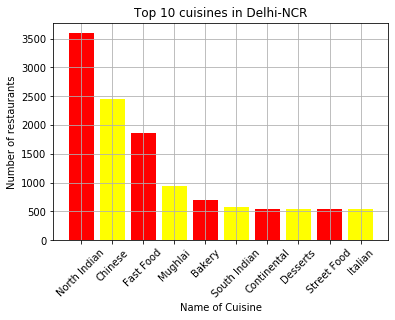

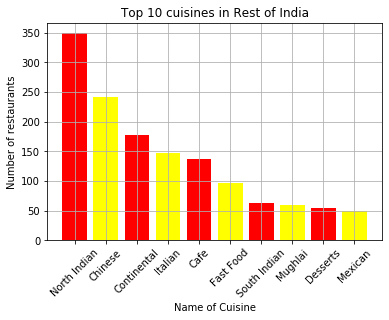

In [79]:
#list top 10 cuisines in NCR
print("top 10 cuisines served by restaurants in delhi-NCR are")
for i in range(10):
    print(pd.Series(ncr).value_counts().index[i], pd.Series(ncr).value_counts().values[i])

# list top 10 cuisines in rest of India
print("top 10 cuisines served by restaurants in ret of India are")
for i in range(10):
    print(pd.Series(ind).value_counts().index[i], pd.Series(ind).value_counts().values[i])

#plot top 10 cuisines in NCR
plt.bar(x=pd.Series(ncr).value_counts().index[0:10], height=pd.Series(ncr).value_counts().values[0:10],color=['red','yellow'])
plt.xticks(rotation=45)
plt.title("Top 10 cuisines in Delhi-NCR")
plt.xlabel("Name of Cuisine")
plt.ylabel("Number of restaurants")
plt.grid('on')
plt.show()

#plot top 10 cuisines in rest of India
plt.bar(x=pd.Series(ind).value_counts().index[0:10], height=pd.Series(ind).value_counts().values[0:10],color=['red','yellow'])
plt.xticks(rotation=45)
plt.title("Top 10 cuisines in Rest of India")
plt.xlabel("Name of Cuisine")
plt.ylabel("Number of restaurants")
plt.grid('on')
plt.show()

### Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

In [80]:
#cuisines availabel in ncr but not in rest of India
for i in (set(ncr)-set(ind)):
    print(i,end=' ,')

Raw Meats ,Cuisine Varies ,Persian ,Bihari ,Sri Lankan ,Belgian ,Sushi ,Deli ,Turkish ,South American ,Iranian ,Pakistani ,Oriya ,Kashmiri ,Naga ,Drinks Only ,Afghani ,Assamese ,Nepalese ,Moroccan ,

<Figure size 720x720 with 0 Axes>

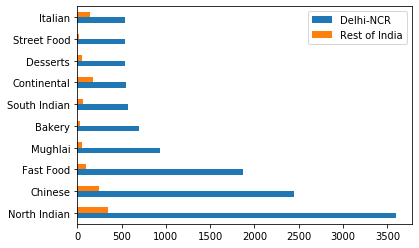

<Figure size 720x720 with 0 Axes>

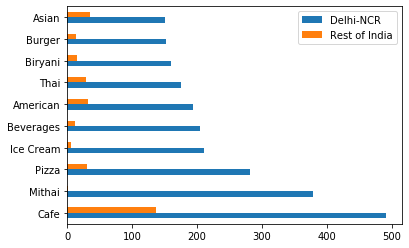

<Figure size 720x720 with 0 Axes>

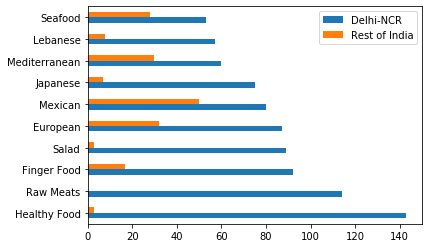

<Figure size 720x720 with 0 Axes>

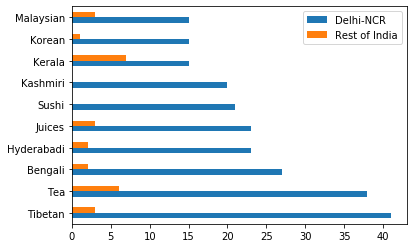

<Figure size 720x720 with 0 Axes>

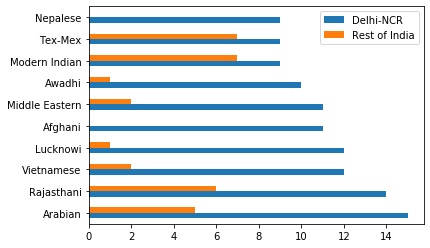

<Figure size 720x720 with 0 Axes>

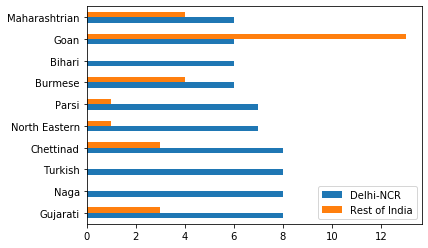

<Figure size 720x720 with 0 Axes>

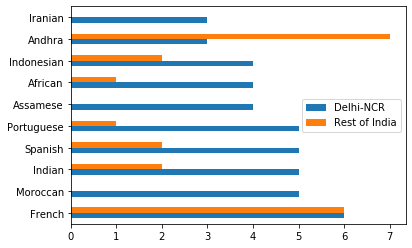

<Figure size 720x720 with 0 Axes>

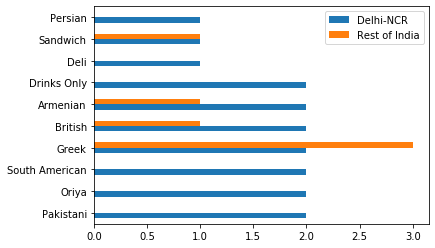

<Figure size 720x720 with 0 Axes>

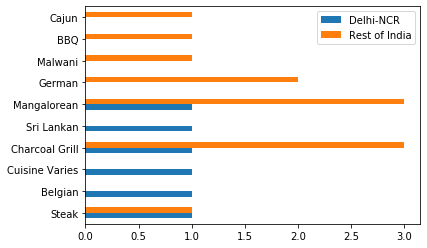

In [81]:
#plot number of restauarants in NCR and Rest of India for each cuisine
ncr_roi = pd.concat([pd.Series(ncr).value_counts(), pd.Series(ind).value_counts()],axis=1,sort=False)
ncr_roi.fillna(0,inplace=True)

for i in range(0,90,10):
    plt.figure(figsize=(10,10))
    ncr_roi[:][0+i:10+i].plot.barh()
    plt.legend(['Delhi-NCR','Rest of India'])
    plt.show()

In [82]:
#detailed analysis in pdf file

### --------------------------------------------------------------------------------------------------------------------------------------------------------<br>------------------------------------------------------------------------------------------------------------------------------------------------------------


# User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### Rating vs Number of Votes

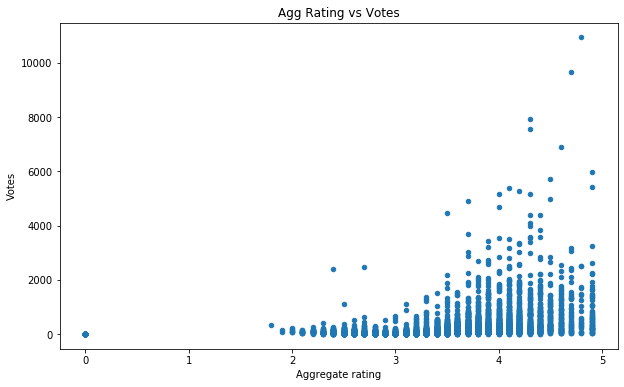

In [83]:
zomato_data.plot.scatter(x='Aggregate rating',y='Votes',figsize=(10,6), title="Agg Rating vs Votes")
plt.show()
## some restaurants have zero votes and rating

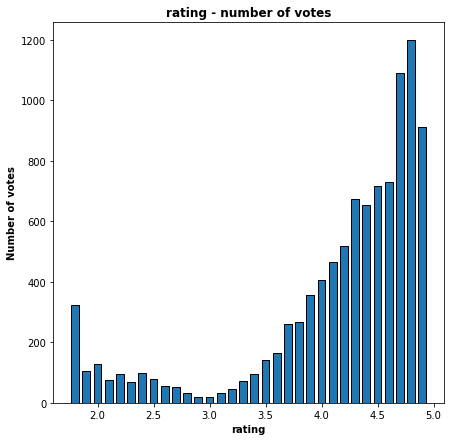

In [84]:
# pllot between each rating and aggregate number of votes for that rating

mk={}
for rating in sorted(df['Aggregate rating'].unique()):
    if rating !=0:
        mk[rating] = df.loc[df['Aggregate rating']==rating,'Votes'].mean()
plt.figure(figsize=(7,7))
plt.bar(mk.keys(),mk.values(),edgecolor='black',width=0.07)
plt.title("rating - number of votes",fontweight='bold')
plt.xlabel("rating",fontweight='bold')
plt.ylabel("Number of votes",fontweight='bold')

plt.show()

In [85]:
df.loc[df['Aggregate rating']!=0,'Aggregate rating'].corr(df['Votes'])

0.40901786341810925

### Restaurant serving more number of cuisines.

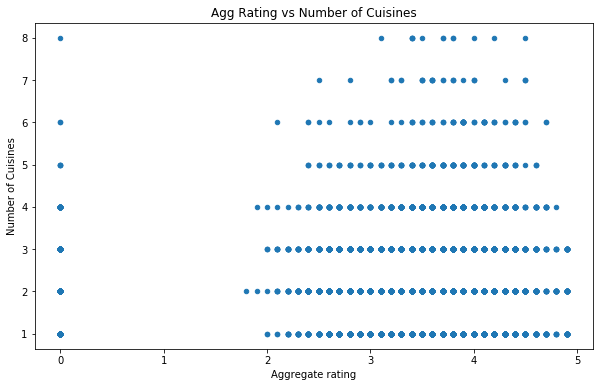

In [95]:
#We will have to drop rows where cuisines are NaN
df1 = (df.dropna()).copy()
#Add number of cuisines attribute
df1.reset_index(drop=True, inplace=True)
df1['Number of Cuisines']=None
for ind in df1.index:
    df1.loc[ind,'Number of Cuisines'] = int(len(df1.loc[ind,'Cuisines'].split(',')))
    
#scttter plot
df1.plot.scatter(x='Aggregate rating',y='Number of Cuisines',figsize=(10,6), title="Agg Rating vs Number of Cuisines")
plt.show()

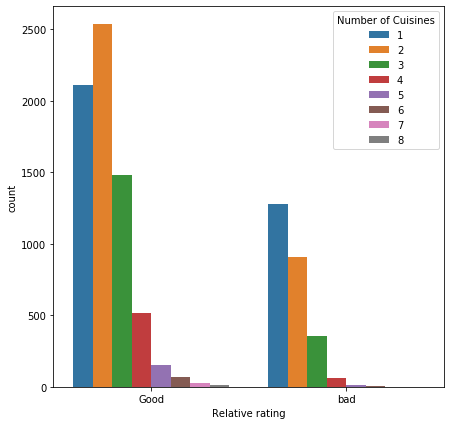

In [96]:
#Divide ratings into good and bad for better visualisation
#rating above the average of whole dataset is considered as good and below is considered as bad

df1['Relative rating']=None
avg_rating = df1["Aggregate rating"].mean()
df1["Relative rating"] = df1["Aggregate rating"].apply(lambda x: 'Good' if x > avg_rating else 'bad')
import seaborn as sns
plt.figure(figsize=(7,7))
sns.countplot(x = "Relative rating", hue = "Number of Cuisines", data = df1)
plt.show()

In [98]:
df1.loc[df1['Aggregate rating']!=0,'Aggregate rating'].corr(df1['Number of Cuisines'])

0.11644964381507705

### Average Cost of Restaurant Vs rating

In [106]:
#we will have to factor in currency otherwise the results might get skewed based n currency value
print(df.groupby('Currency')['Average Cost for two'].min())

Currency
Botswana Pula(P)            600
Brazilian Real(R$)           30
Dollar($)                     0
Emirati Diram(AED)           40
Indian Rupees(Rs.)            0
Indonesian Rupiah(IDR)    70000
NewZealand($)                20
Pounds(£)                   10
Qatari Rial(QR)              50
Rand(R)                     110
Sri Lankan Rupee(LKR)      1000
Turkish Lira(TL)             30
Name: Average Cost for two, dtype: int64


In [112]:
##Drop restaurants with zero average cost because, rstaurants can't have zero cost
zero_cost = (df[df['Average Cost for two']==0]).index
df2 = (df.drop(zero_cost)).copy()
df2.reset_index(inplace=True, drop=True)

(9533, 21)

<Figure size 576x576 with 0 Axes>

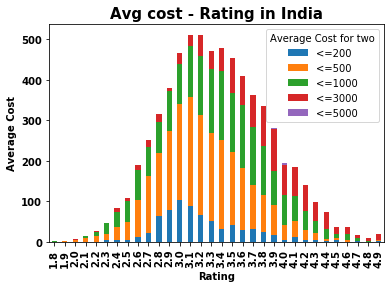

In [114]:
#Plottig detailed cost v/s rating for India
plt.figure(figsize=(8,8))
cost_for_two = pd.cut(df.loc[df['Currency']=='Indian Rupees(Rs.)','Average Cost for two'],bins = [0, 200, 500, 1000, 5000, 8000],labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000',])
cost_plt=pd.crosstab(df.loc[df['Aggregate rating']!=0,'Aggregate rating'],cost_for_two)
cost_plt.plot(kind='bar',stacked=True);
plt.title('Avg cost - Rating in India',fontsize=15,fontweight='bold')
plt.ylabel('Average Cost',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.show();

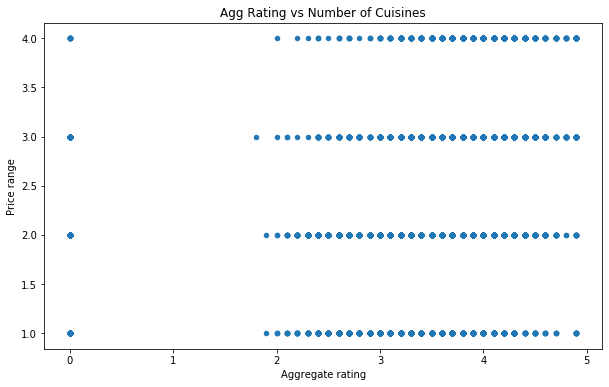

In [115]:
# due to different currency values scatter plot between price range and rating
df.plot.scatter(x='Aggregate rating',y='Price range',figsize=(10,6), title="Agg Rating vs Number of Cuisines")
plt.show()

### Restaurant serving some specific cuisines vs rating

In [116]:
cus_name=[] ##This list will hold all cuisine names when their name appears in data
rate=[]  ##This list will hold aggregate rating for every cuisine occurence
for i in df1.loc[df1['Aggregate rating'] != 0 ,:].index:
    c=df1.loc[i,'Cuisines']
    cus=c.split(',')
    cus=[i.strip() for i in cus]
    for j in cus:
        cus_name.append(j)
        rate.append(df1.loc[i,'Aggregate rating'])

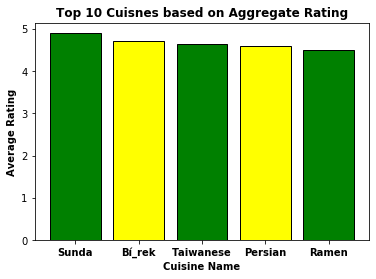

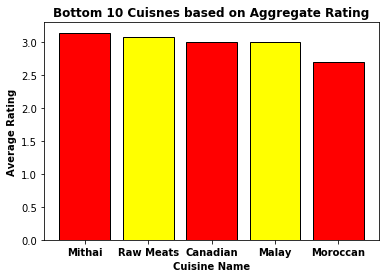

In [117]:
#temp_df data Frame hold cus_name and rate lists as data frame
temp_df = pd.DataFrame(list(zip(cus_name, rate)), 
               columns =['Cuisine', 'Rating']) 
temp_df.sort_values(by=['Rating'],ascending=False,inplace=True)  ##sort on basis of rating
temp_df.reset_index(drop=True,inplace=True) ## resest index
temp_df = temp_df.groupby('Cuisine')['Rating'].mean()## group values by cuisine
# so now temp_df holds cuisine name and its mean rating
temp_df.sort_values(ascending=False,inplace=True)

#plot top 10 cuisines and their mean rating
plt.title('Top 10 Cuisnes based on Aggregate Rating',fontweight='bold')
plt.bar(temp_df.index[0:5],temp_df.values[0:5],color=['Green','yellow'],edgecolor='black')
plt.xlabel('Cuisine Name',fontweight='bold')
plt.ylabel('Average Rating',fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

#plot bottom 10 cuisines and their mean rating
plt.title('Bottom 10 Cuisnes based on Aggregate Rating',fontweight='bold')
plt.bar(temp_df.index[138:143],temp_df.values[138:143],color=['red','yellow'],edgecolor='black')
plt.xlabel('Cuisine Name',fontweight='bold')
plt.ylabel('Average Rating',fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

## Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?<br>Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [123]:
df['weighted rank'] = df.apply(lambda row: row['Aggregate rating'] * row['Votes'] , axis=1)
x = df.groupby('Locality')['weighted rank'].sum()
y = df.groupby('Locality')['Votes'].sum()
locality_rank=x/y  
locality_rank = locality_rank.sort_values(ascending=False)

In [126]:
print("weighted rating of locality is->")
for i in range(len(locality_rank)):
    print(locality_rank.index[i], locality_rank.values[i])

weighted rating of locality is->
Old Dutch Hospital, Fort 4.9
The Milk District 4.9
Kenwood 4.9
Aminabad 4.9
Deira City Centre Area 4.9
Lexington Street, Soho 4.9
Venetian Village, Al Maqtaa 4.9
DIFC 4.9
Paia 4.9
City and Suburban 4.9
Penjaringan 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Cengkareng 4.9
Barwa Towers, Al Sadd 4.9
Beak Street, Soho 4.9
Caddebostan 4.9
Bebek 4.9
Sofitel Philippine Plaza Manila, Pasay City 4.9
Pondok Aren 4.9
West Park 4.9
Bishopsgate, City Of London 4.9
Marshalltown 4.9
Fort Street 4.9
Setor De Clubes Esportivos Sul 4.9
Windermere 4.9
New Tampa 4.9
Taman Impian Jaya Ancol, Ancol 4.9
Nassima Royal Hotel, Trade Centre Area 4.9
Gíçvea 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Hotel Unique, Jardim Paulista 4.8
UP Town Center, Diliman, Quezon City 4.8
Muwailih Commercial 4.8
Centro 4.8
Galeria River, Copacabana 4.8
Dubai Media City 4.8
Century City Mall, Poblacion, Makati City 4.8
Deccan Gymkhana 4.8
Sanford

In [127]:
print("top 10 localities are->")
for i in range(len(locality_rank)):
    print(locality_rank.index[i], locality_rank.values[i])

top 10 localities are->
Old Dutch Hospital, Fort 4.9
The Milk District 4.9
Kenwood 4.9
Aminabad 4.9
Deira City Centre Area 4.9
Lexington Street, Soho 4.9
Venetian Village, Al Maqtaa 4.9
DIFC 4.9
Paia 4.9
City and Suburban 4.9
Penjaringan 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Cengkareng 4.9
Barwa Towers, Al Sadd 4.9
Beak Street, Soho 4.9
Caddebostan 4.9
Bebek 4.9
Sofitel Philippine Plaza Manila, Pasay City 4.9
Pondok Aren 4.9
West Park 4.9
Bishopsgate, City Of London 4.9
Marshalltown 4.9
Fort Street 4.9
Setor De Clubes Esportivos Sul 4.9
Windermere 4.9
New Tampa 4.9
Taman Impian Jaya Ancol, Ancol 4.9
Nassima Royal Hotel, Trade Centre Area 4.9
Gíçvea 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Hotel Unique, Jardim Paulista 4.8
UP Town Center, Diliman, Quezon City 4.8
Muwailih Commercial 4.8
Centro 4.8
Galeria River, Copacabana 4.8
Dubai Media City 4.8
Century City Mall, Poblacion, Makati City 4.8
Deccan Gymkhana 4.8
Sanford 4.8
Expr

# ----------------------------------------------------------------------------------------------------------<br>----------------------------------------------------------------------------------------------------------------

# Visualization

### Plot the bar graph top 15 restaurants have a maximum number of outlets.

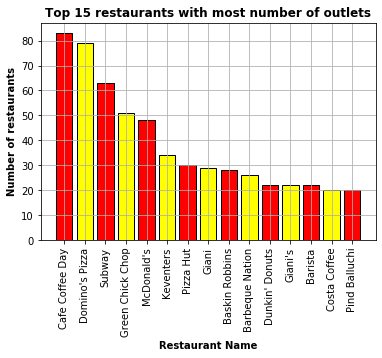

In [167]:
res_num = df['Restaurant Name'].value_counts()
plt.bar(res_num.index[0:15],res_num.values[0:15],color=['red','yellow'],edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Restaurant Name",fontweight='bold')
plt.ylabel("Number of restaurants",fontweight='bold')
plt.title("Top 15 restaurants with most number of outlets",fontweight='bold')
plt.grid('on')
plt.show()

In [168]:
print("Top 15 restaurants with most outlets are-->")
for i in range(15):
    print(res_num.index[i], res_num.values[i])

Top 15 restaurants with most outlets are-->
Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 30
Giani 29
Baskin Robbins 28
Barbeque Nation 26
Dunkin' Donuts 22
Giani's 22
Barista 22
Costa Coffee 20
Pind Balluchi 20


### Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

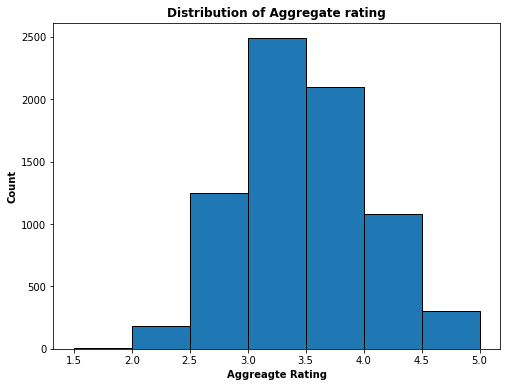

In [169]:
df_rated = df.drop(df[df['Aggregate rating']==0].index)
plt.figure(figsize=(8,6))
plt.hist(df_rated['Aggregate rating'],edgecolor='black',bins=np.arange(1.5,5.1,0.5))
plt.xlabel("Aggreagte Rating",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.title("Distribution of Aggregate rating",fontweight='bold')
plt.show()

### Plot the bar graph top 10 restaurants in the data with the highest number of votes.

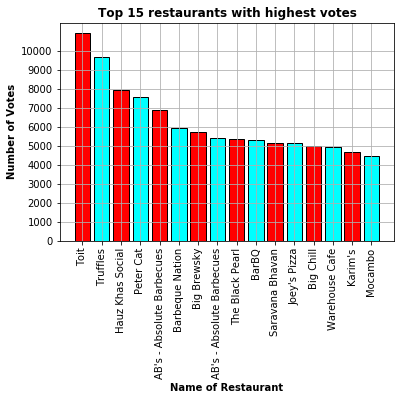

top 10 restaurants based on DIFFERENT OUTLETS AS DIFFERENT REST.--->>>
Toit 10934
Truffles 9667
Hauz Khas Social 7931
Peter Cat 7574
AB's - Absolute Barbecues 6907
Barbeque Nation 5966
Big Brewsky 5705
AB's - Absolute Barbecues 5434
The Black Pearl 5385
BarBQ 5288
Saravana Bhavan 5172
Joey's Pizza 5145
Big Chill 4986
Warehouse Cafe 4914
Karim's 4689
Mocambo 4464


In [170]:
##CONSIDERING DIFFERENT OUTLETS AS DIFFERENT RESTAURANTS
df_votes = (df.sort_values(by=['Votes'],ascending=False)).copy()
name=[]
vot=[]
name = list(df_votes['Restaurant Name'][0:16])
vot = list(df_votes['Votes'][0:16])
plt.bar(np.arange(0,16,1),vot,edgecolor='black',color=['red','cyan'])
plt.xlabel('Name of Restaurant',fontweight='bold')
plt.ylabel('Number of Votes',fontweight='bold')
plt.title("Top 15 restaurants with highest votes",fontweight='bold')
plt.xticks(np.arange(0,16,1),labels=name,rotation=90)
plt.yticks(np.arange(0,11000,1000))
plt.grid('on')
plt.show()

print("top 10 restaurants based on DIFFERENT OUTLETS AS DIFFERENT REST.--->>>")
for i in range(len(name)):
    print(name[i], vot[i])

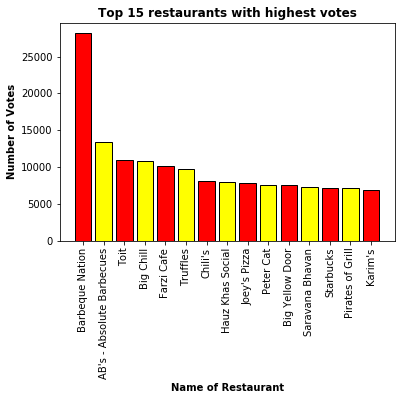

In [171]:
###CONSIDERING ALL OUTLETS OF ONE RESTAURANTS AND SINGLE ENTITY AND ADDING UP THEIR VOTES

grouped = df.groupby('Restaurant Name').sum().reset_index()
grouped=grouped.sort_values('Votes', ascending=False).reset_index()
plt.bar(grouped.loc[0:14,'Restaurant Name'],grouped.loc[0:14,'Votes'],color=['red','yellow'],edgecolor='black')
plt.xlabel('Name of Restaurant',fontweight='bold')
plt.ylabel('Number of Votes',fontweight='bold')
plt.title("Top 15 restaurants with highest votes",fontweight='bold')
plt.xticks(rotation=90)
plt.show()


In [172]:
for i in range(15):
    print(grouped.loc[i,'Restaurant Name'],grouped.loc[i,'Votes'])

Barbeque Nation 28142
AB's - Absolute Barbecues 13400
Toit 10934
Big Chill 10853
Farzi Cafe 10098
Truffles 9682
Chili's 8156
Hauz Khas Social 7931
Joey's Pizza 7807
Peter Cat 7574
Big Yellow Door 7511
Saravana Bhavan 7238
Starbucks 7139
Pirates of Grill 7091
Karim's 6878


### Plot the pie graph of top 10 cuisines present in restaurants in the USA

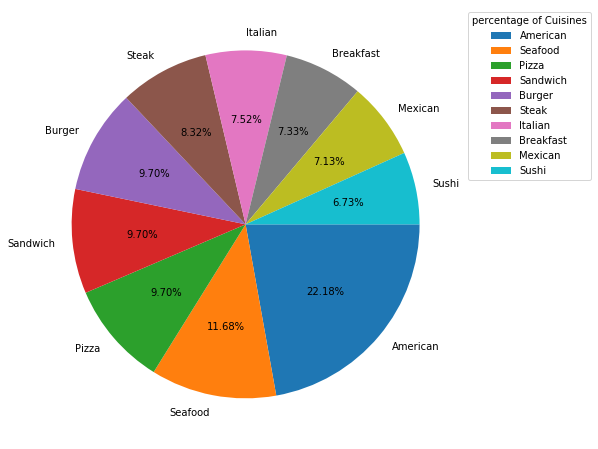

In [179]:
df.dropna(inplace=True)
us_cus=[]
for i in df.loc[df['Country Code']==216,'Cuisines']:
    temp=i.split(',')
    for i in temp:
        us_cus.append(i.strip())
cus_cnt = pd.Series(us_cus).value_counts()
cus_cnt.sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(cus_cnt.values[0:10], labels=cus_cnt.index[0:10],counterclock=False,autopct='%0.2f%%')
plt.legend(title="percentage of Cuisines",loc="upper left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [182]:
for i in range(10):
    print(cus_cnt.index[i])

American
Seafood
Pizza
Sandwich
Burger
Steak
Italian
Breakfast
Mexican
Sushi


### Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [183]:
df_indian = zomato_data[zomato_data['Country Code']==1].copy()
df_indian.reset_index(drop=True, inplace =True)

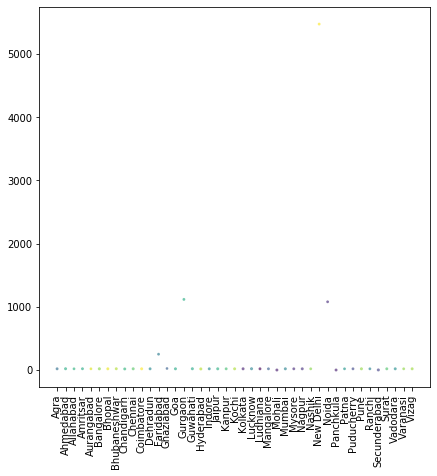

In [184]:
df_indian['weighted rank'] = df_indian.apply(lambda row: row['Aggregate rating'] * row['Votes'] , axis=1)
x = df_indian.groupby('City')['weighted rank'].sum()
y = df_indian.groupby('City')['Votes'].sum()
city_rank=x/y  
city_num =  df_indian['City'].value_counts()
city_rank.sort_index(axis=0,ascending=True, inplace=True)
city_num.sort_index(axis=0,ascending=True, inplace=True)
plt.figure(figsize=(7,7))
plt.scatter(city_num.index, city_num.values, s=city_rank.values,c=np.random.rand(43),alpha=0.5)
plt.xticks(rotation=90)
plt.show()
#########################################
## BECAUSE THE AGGREGATE RATING IS NOT MUVH DIFFERENT NO VISIBLE DIFFERENCE IN SIZE
##NOTICE DIFFERENT COLORS

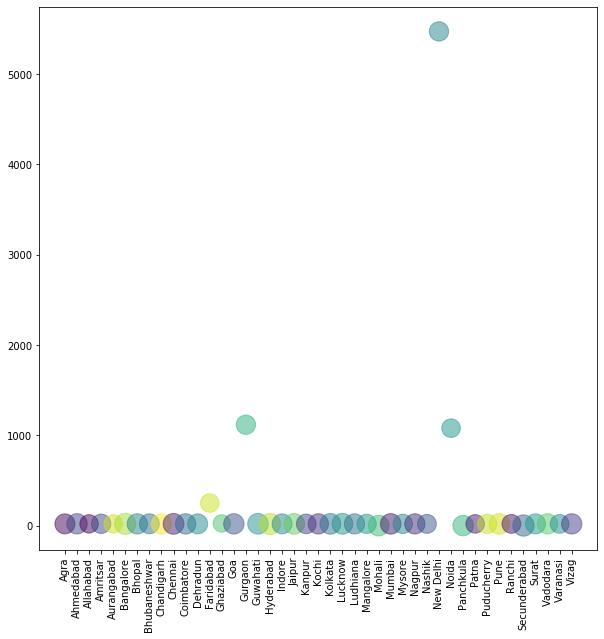

In [185]:
#######################
###FOR VISIBLE DIFFERENCE IN SIZE WE MULTIPLY SIZE BY 100
plt.figure(figsize=(10,10))
plt.scatter(city_num.index, city_num.values, s=(city_rank.values)*100,c=np.random.rand(43),alpha=0.5)
plt.xticks(rotation=90)
plt.show()